# Belief Propagation Sandbox

For testing particle belief propagation methods.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from src.sim import spider

%matplotlib inline

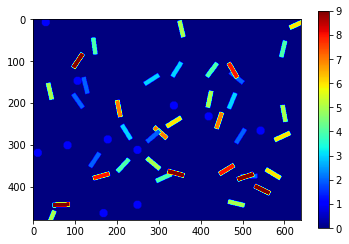

In [20]:
N_RECT = 30
N_CIRC = 10

scene = spider.SpiderScene(N_RECT, N_CIRC)
obs = scene.observation()

plt.imshow(obs, cmap=plt.get_cmap("jet"))
plt.colorbar()

In [21]:
from src.sim import likelihoods

img = scene.image(obs)
spi_obs = scene.spider.observation()
score = likelihoods.spider_ave_score(obs, scene.spider)

noisy_spider = spider.Spider(scene.spider.x, scene.spider.y)
noisy_spi_obs = noisy_spider.observation()
noisy_score = likelihoods.spider_ave_score(obs, noisy_spider)

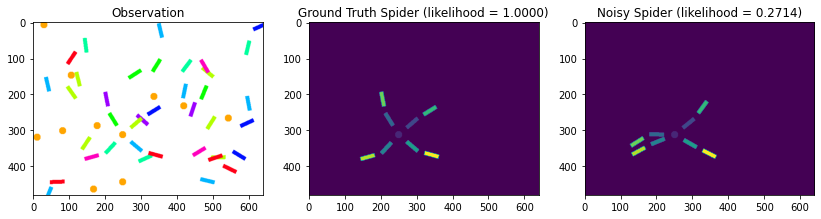

In [22]:
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
plt.title("Observation")
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.title("Ground Truth Spider (likelihood = {:.4f})".format(score))
plt.imshow(spi_obs)
plt.subplot(1, 3, 3)
plt.title("Noisy Spider (likelihood = {:.4f})".format(noisy_score))
plt.imshow(noisy_spi_obs)

## Particle Belief Propagation

In [32]:
from src.sim import graph

N_PARTICLES = 150
N_ITERS = 20

g = graph.SpiderGraph(N_PARTICLES)
# g.init_random()
g.init_obs(obs)

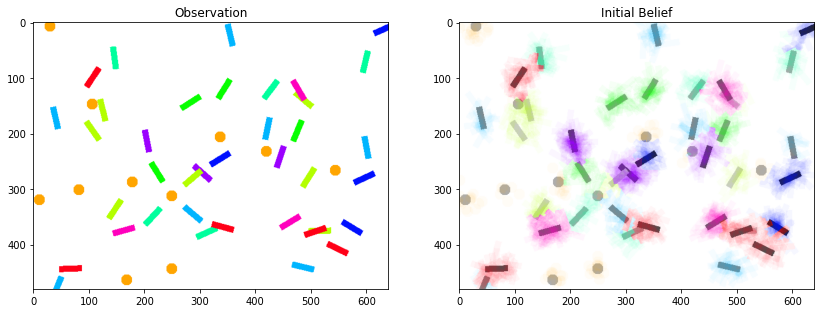

In [33]:
initial_bel = scene.display_belief(g.marginals(), img)

plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.title("Observation")
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title("Initial Belief")
plt.imshow(initial_bel)

In [34]:
def plot_output(bel, est):
    plt.figure(figsize=(14,8))
    plt.subplot(1, 2, 1)
    plt.title("Belief at iteration {}".format(i + 1))
    plt.imshow(bel)
    plt.subplot(1, 2, 2)
    plt.title("Estimate at iteration {}".format(i + 1))
    plt.imshow(est)

Running iteration: 1
IOU: 0.4455


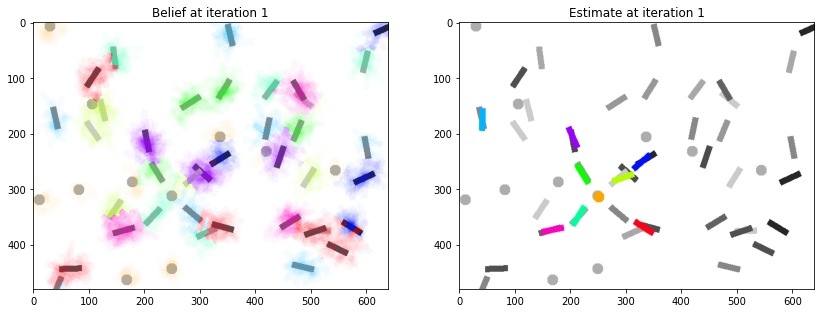

Running iteration: 2
IOU: 0.3888


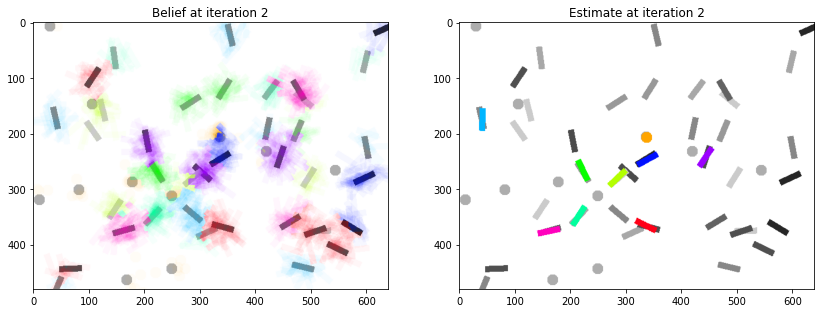

Running iteration: 3
IOU: 0.6221


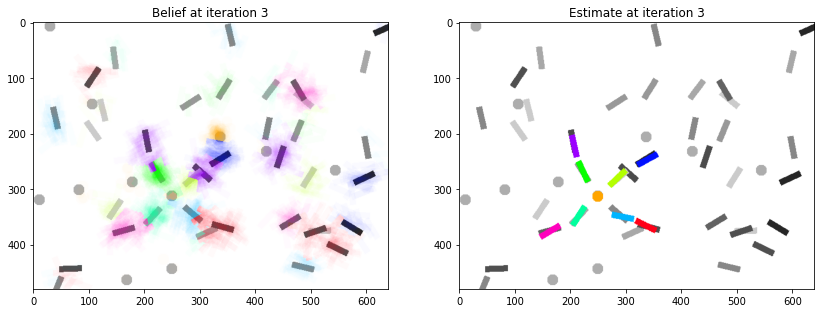

Running iteration: 4
IOU: 0.5920


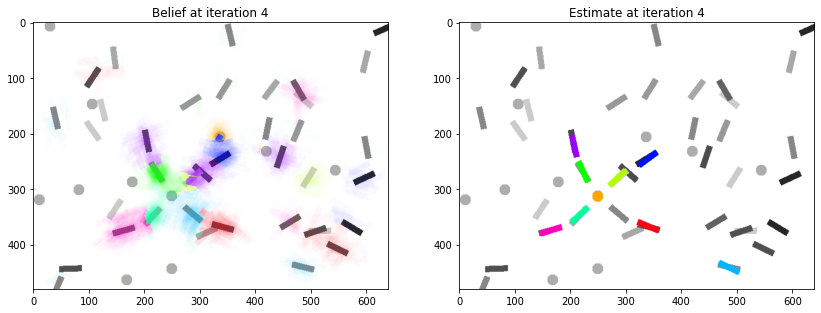

Running iteration: 5
IOU: 0.4914


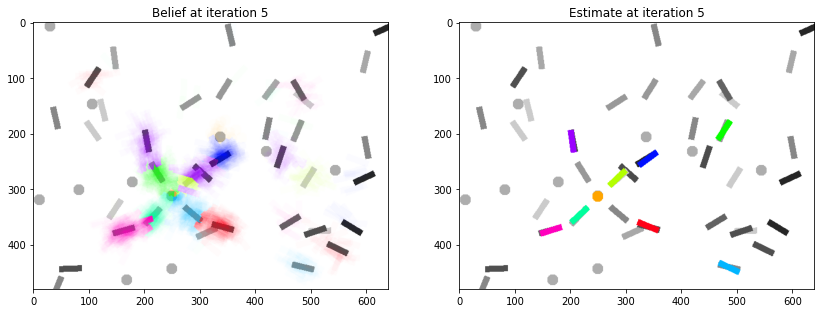

Running iteration: 6
IOU: 0.7344


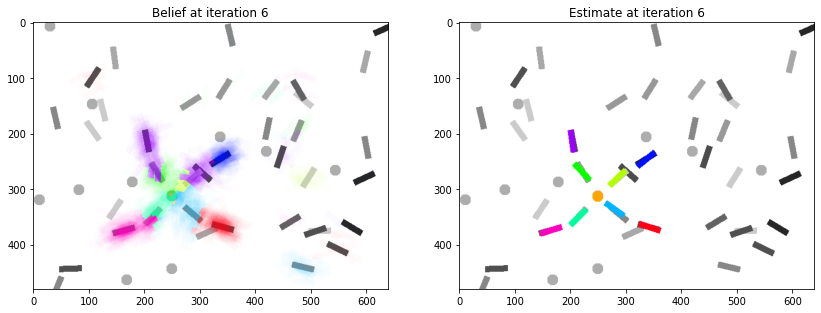

Running iteration: 7
IOU: 0.7838


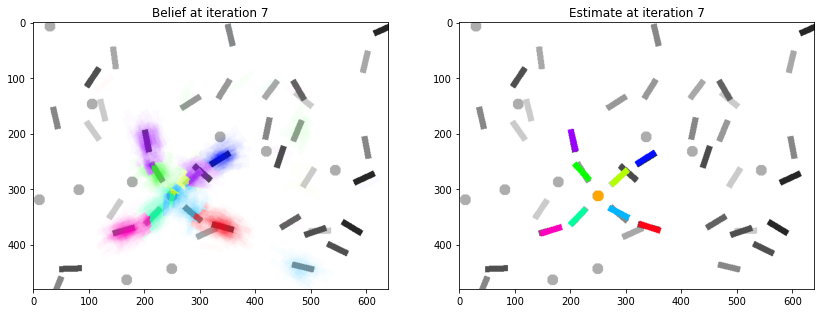

Running iteration: 8
IOU: 0.8078


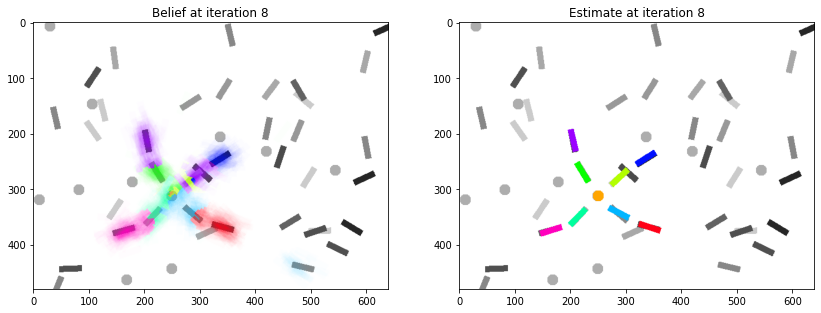

Running iteration: 9
IOU: 0.8217


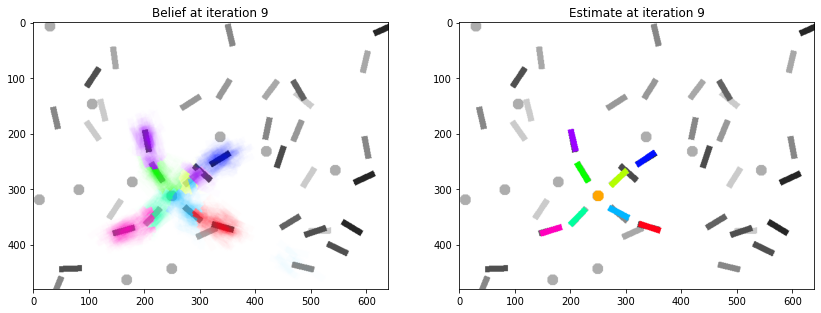

Running iteration: 10
IOU: 0.8692


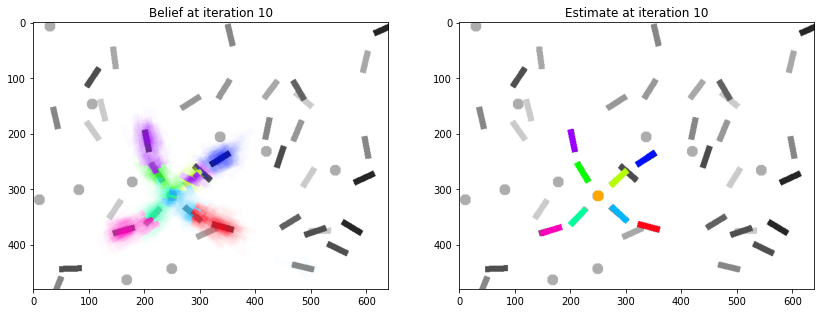

Running iteration: 11
IOU: 0.8752


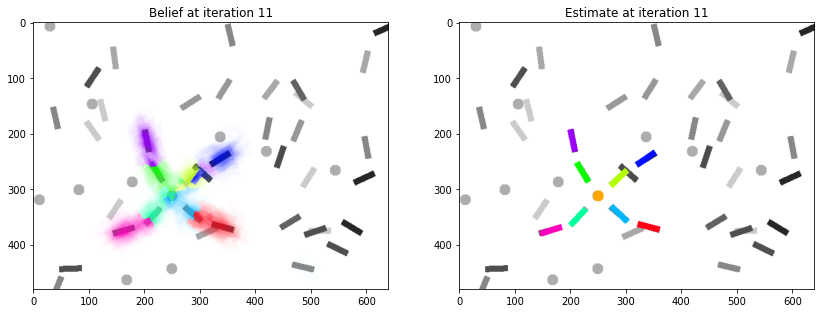

Running iteration: 12
IOU: 0.8867


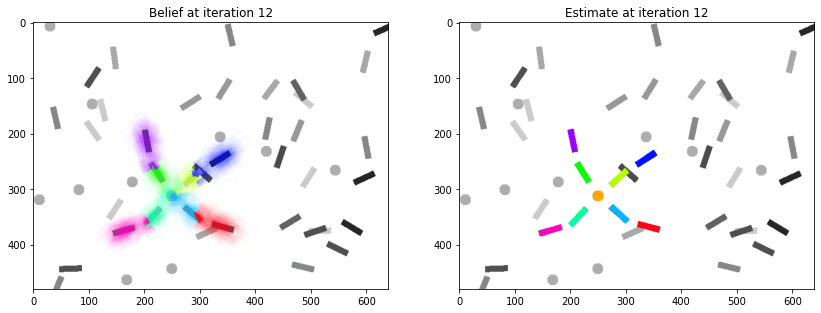

Running iteration: 13
IOU: 0.8862


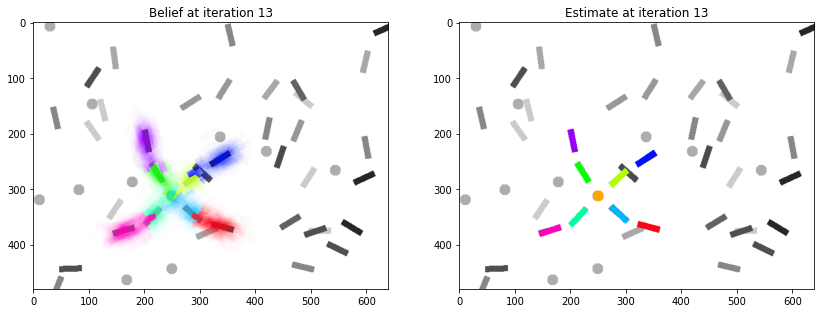

Running iteration: 14
IOU: 0.8862


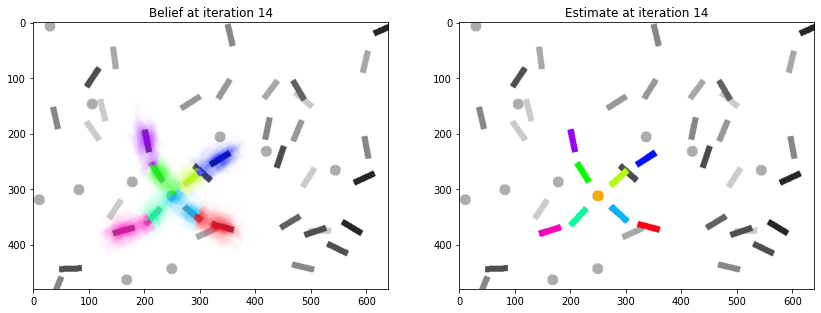

Running iteration: 15
IOU: 0.8862


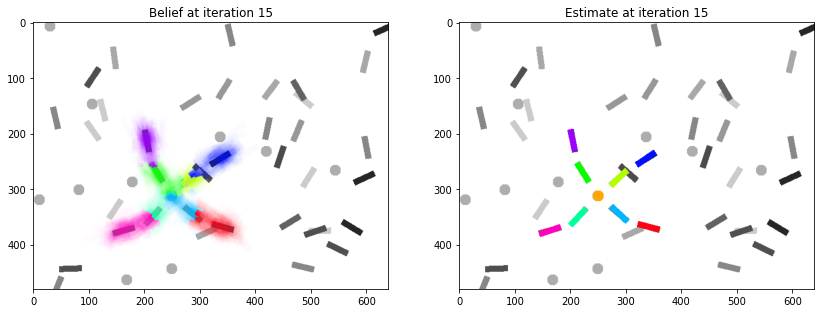

Running iteration: 16
IOU: 0.8947


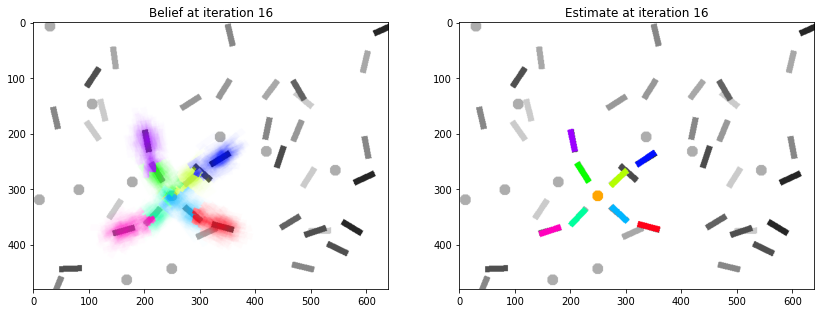

Running iteration: 17
IOU: 0.8974


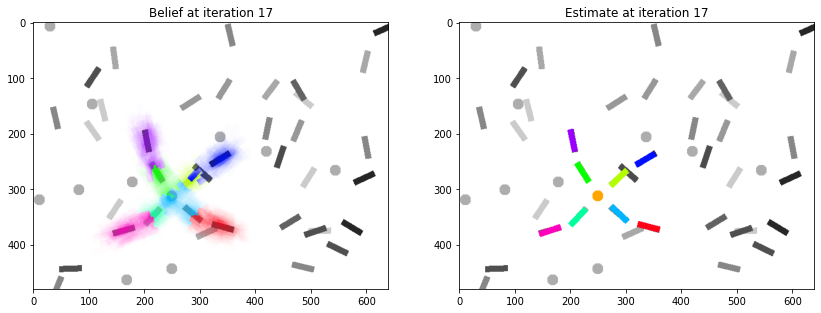

Running iteration: 18
IOU: 0.9002


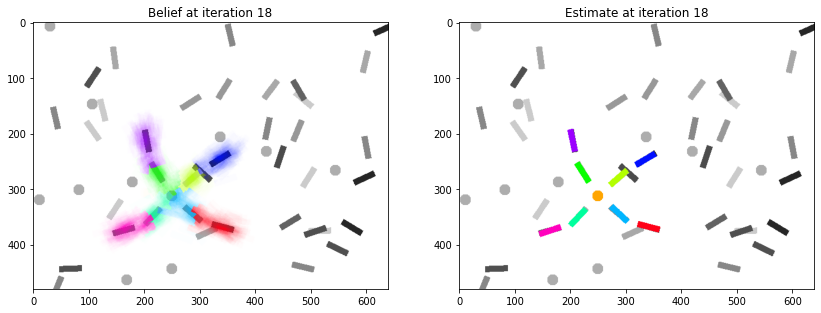

Running iteration: 19
IOU: 0.9146


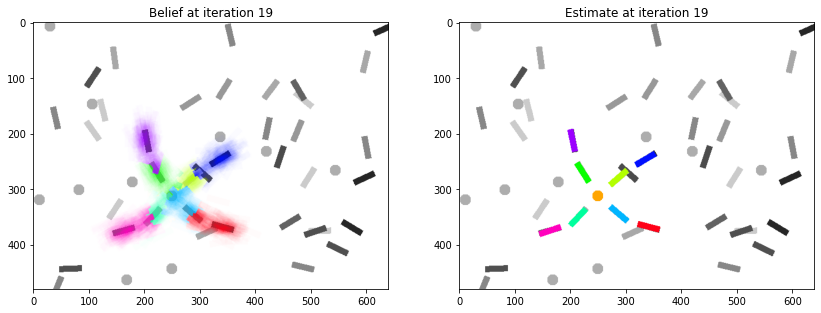

Running iteration: 20
IOU: 0.9158


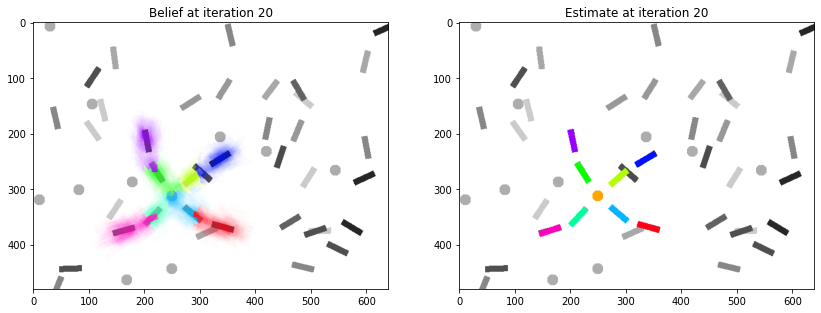

In [35]:
# Run iterations.
ious = []
for i in range(N_ITERS):
    print("Running iteration:", i + 1)
    g.update_messages(obs)
    g.update_belief(obs)
    
    bel = g.marginals()
    est = g.estimate()
    
    g.resample()
    g.jitter()
    
    ious.append(scene.iou(est))
    print("IOU: {:.4f}".format(ious[-1]))
    
    bel = scene.display_belief(bel, img)
    est = scene.display_estimate(est, img)
    plot_output(bel, est)
    plt.show()

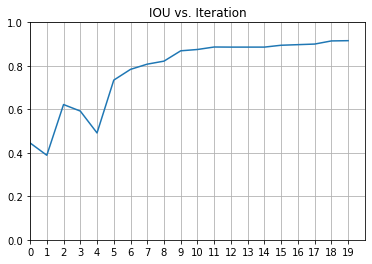

In [37]:
plt.figure()
plt.title("IOU vs. Iteration")
plt.ylim([0, 1])
plt.xlim([0, N_ITERS])
plt.xticks(np.arange(N_ITERS))
plt.grid()
plt.plot(np.arange(N_ITERS), ious)